<div style="background-color: lightblue; color: black; padding: 20px; font-weight: bold; font-size: 15px;">Extra Trees</div>

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">This notebook contains the centerpiece of our project. Here you can find the final model we decided on. <br><br>
First the data from feature engineering is read in, (please make sure to run notebook feature engineering extra trees first) a train-test split is performed and SKlearn's ExtraTreesRegressor is used to predict sales figures for 2012.<br><br> 
After applying this algorithm with the default hyperparameters, a GridSearchCV is performed to tune the hyperparameters and refine our prediction. Then the algorithm is used again with these optimised hyperparameters. Furthermore, a randomised GridSearch is applied to see if good values for our model can be found outside the previously used range of hyperparameters.<br><br>
Next, the results are displayed in lineplots so that the target weekly sales and the predicted target can be compared. In a final step, we show error plots. Here we have two scatter plots, one showing actual target and predicted target, while the other shows the residuals.</div>

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">
Results: <br>
Compared to the baseline model, we were able to significantly improve the prediction error. In the forecast period, we have total sales of approximately $2 billion. The baseline model makes an error of about $465 million, while our best model makes an error of about $347 million. This means that the forecast has been improved by about $118 million.</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error

# import self-written functions to get metrics and split data
from metrics import get_metrics
from split import split_data, train_val_test
from error import error_analysis

RSEED=42

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Read data</div>

Here the dataframe with the features generated for Extra Trees is used.

In [2]:
df = pd.read_pickle('../data/data_combined_clean_features_11.pkl')

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Train test split</div><br><br>
Considering the temporal structure of our data in combination with the structure of stores and departments, we do not use SKlearn's test-train split, but perform the split with code we have written ourselves.

In [3]:
#define train, validation and test dataset
X_train, y_train, X_validation, y_validation, X_test, y_test = split_data(df)

# making whole train, validation and test dataset accessable
train, validation, test = train_val_test(df)

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Extra Trees</div>

In [4]:
# instantiate model
model = ExtraTreesRegressor(
    n_estimators=100,
    random_state=42)

# fit the model with train data 
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_validation = model.predict(X_validation)
y_pred_test = model.predict(X_test)

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Calculating metrics for Extra Trees</div>

In [5]:
get_metrics(y_train, y_pred_train, 'Train')
get_metrics(y_validation, y_pred_validation, 'Validation')
get_metrics(y_test, y_pred_test, 'Test')

- - - - - - - - - - 
Metrics for Train
Mean weekly sales: 17639.364
Standard deviation weekly sales: 23534.607
MSE: 0.0
RMSE: 0.0
- - - - - - - - - - 
- - - - - - - - - - 
Metrics for Validation
Mean weekly sales: 17342.499
Standard deviation weekly sales: 22893.483
MSE: 10903347.483
RMSE: 3302.022
- - - - - - - - - - 
- - - - - - - - - - 
Metrics for Test
Mean weekly sales: 17402.01
Standard deviation weekly sales: 22530.901
MSE: 7088504.117
RMSE: 2662.424
- - - - - - - - - - 


<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">GridSearchCV</div>

In [ ]:
# Defining parameter grid (as dictionary)
param_grid = {
            "n_estimators" : [100, 125, 150],
            "max_depth" : [25, 30, 40],
            "min_samples_leaf" : [1, 2, 5, 6],
            "max_features" : [0.5, 1, 2, 'sqrt', 'log2'],
             }

# Instantiate gridsearch and define the metric to optimize 
gs = GridSearchCV(ExtraTreesRegressor(random_state=RSEED), 
                     param_grid, 
                     scoring= "neg_root_mean_squared_error",
                     cv=2,
                     verbose=5,
                     n_jobs=-1)

# Fit gridsearch object to data.. also lets see how long it takes
#start = timer()
gs.fit(X_train, y_train)
#end = timer()
#gs_time = end-start


In [10]:
# Best score
print('Best score:', round(gs.best_score_, 3))

# Best parameters
print('Best parameters:', gs.best_params_)

Best score: -5376.265
Best parameters: {'max_depth': 25, 'max_features': 0.5, 'min_samples_leaf': 1, 'n_estimators': 100}


<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Extra Trees with tuned hyperparameter grid I</div>

In [10]:
# instantiate model
model = ExtraTreesRegressor(
    max_depth=25, 
    max_features=0.5, 
    min_samples_leaf=1, 
    n_estimators= 100,
    random_state=42)

# fit the model with train data 
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_validation = model.predict(X_validation)
y_pred_test = model.predict(X_test)

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Calculating metrics for Extra Trees with tuned parameter grid I</div>

In [11]:
get_metrics(y_train, y_pred_train, 'Train')
get_metrics(y_validation, y_pred_validation, 'Validation')
get_metrics(y_test, y_pred_test, 'Test')

- - - - - - - - - - 
Metrics for Train
Mean weekly sales: 17639.364
Standard deviation weekly sales: 23534.607
MSE: 1190150.665
RMSE: 1090.94
- - - - - - - - - - 
- - - - - - - - - - 
Metrics for Validation
Mean weekly sales: 17342.499
Standard deviation weekly sales: 22893.483
MSE: 11017994.196
RMSE: 3319.336
- - - - - - - - - - 
- - - - - - - - - - 
Metrics for Test
Mean weekly sales: 17402.01
Standard deviation weekly sales: 22530.901
MSE: 7087163.445
RMSE: 2662.173
- - - - - - - - - - 


This model performs slightly worse on validation data (now: 3319 before: 3302) and just as well on test data. The advantage is that through regularisation using the hyperparameters - especially the max depth control -, the train data are no longer completely overfitted. 

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">GridSearchCV II</div><br>
Next, we investigate whether we can still find optimisation potential in the close vicinity of the present best parameters.

In [ ]:
# Defining parameter grid (as dictionary)
param_grid = {
            "n_estimators" : [90, 100, 110],
            "max_depth" : [22, 25, 28],
            "min_samples_leaf" : [1, 2],
            "max_features" : [0.3, 0.5, 0.7],
             }

# Instantiate gridsearch and define the metric to optimize 
gs = GridSearchCV(ExtraTreesRegressor(random_state=RSEED), 
                     param_grid, 
                     scoring= "neg_root_mean_squared_error",
                     cv=2,
                     verbose=5,
                     n_jobs=-1)

# Fit gridsearch object to data.. also lets see how long it takes
#start = timer()
gs.fit(X_train, y_train)
#end = timer()
#gs_time = end-start

In [14]:
# Best score
print('Best score:', round(gs.best_score_, 3))

# Best parameters
print('Best parameters:', gs.best_params_)

Best score: -5376.265
Best parameters: {'max_depth': 25, 'max_features': 0.5, 'min_samples_leaf': 1, 'n_estimators': 100}


For the second gridsearch, the parameters were chosen closer to the ideal parameters of the first gridseach to see if a more ideal value could be found in the close vicinity of the values.  As no other values are issued, it was confirmed that the first values were already good.

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Randomized GridSearch</div><br>
In the following we check whether there are more ideal values for the hyperparameters that we have not considered so far. For this purpose, we deliberately choose large ranges of values in which the Randomised GridSearch can be active.

In [ ]:
# Define parameter grid for randomized search
param_grid = {"n_estimators" : np.arange(1, 500, 5),
            "max_depth" : np.arange(1, 100, 5),
            "min_samples_leaf" : np.arange(1, 30, 2),
            "max_features" : np.arange(0.0001, 5, 2),
             }

# Instantiate random search and define the metric to optimize 
rs = RandomizedSearchCV(ExtraTreesRegressor(random_state=RSEED), 
                        param_grid, 
                        scoring='neg_root_mean_squared_error',
                        cv=2, 
                        verbose=5, 
                        n_jobs=-1, 
                        n_iter=200, 
                        random_state=RSEED)


# Fit randomized search object to data
rs.fit(X_train, y_train)


In [ ]:
# Best score
print('Best score:', round(rs.best_score_, 3))

# Best parameters
print('Best parameters:', rs.best_params_)

Best score: -6668.239
Best parameters: {'n_estimators': 256, 'min_samples_leaf': 1, 'max_features': 0.0001, 'max_depth': 36}


In [15]:
# instantiate model
model = ExtraTreesRegressor(
    max_depth=36, 
    max_features=0.0001, 
    min_samples_leaf=1, 
    n_estimators= 256,
    random_state=42)

# fit the model with train data 
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_validation = model.predict(X_validation)
y_pred_test = model.predict(X_test)

In [16]:
get_metrics(y_train, y_pred_train, 'Train')
get_metrics(y_validation, y_pred_validation, 'Validation')
get_metrics(y_test, y_pred_test, 'Test')

- - - - - - - - - - 
Metrics for Train
Mean weekly sales: 17639.364
Standard deviation weekly sales: 23534.607
MSE: 219756.816
RMSE: 468.782
- - - - - - - - - - 
- - - - - - - - - - 
Metrics for Validation
Mean weekly sales: 17342.499
Standard deviation weekly sales: 22893.483
MSE: 13564372.92
RMSE: 3682.984
- - - - - - - - - - 
- - - - - - - - - - 
Metrics for Test
Mean weekly sales: 17402.01
Standard deviation weekly sales: 22530.901
MSE: 7868424.003
RMSE: 2805.071
- - - - - - - - - - 


Since we do not get any better values, we hereby end the search for the best hyperparameters and return to our best model so far. We are going to run it once more to have the values available for plotting results and error analysis.

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Best model</div>

In [17]:
# instantiate model
model = ExtraTreesRegressor(
    max_depth=25, 
    max_features=0.5, 
    min_samples_leaf=1, 
    n_estimators= 100,
    random_state=42)

# fit the model with train data 
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_validation = model.predict(X_validation)
y_pred_test = model.predict(X_test)

In [18]:
get_metrics(y_train, y_pred_train, 'Train')
get_metrics(y_validation, y_pred_validation, 'Validation')
get_metrics(y_test, y_pred_test, 'Test')

- - - - - - - - - - 
Metrics for Train
Mean weekly sales: 17639.364
Standard deviation weekly sales: 23534.607
MSE: 1190150.665
RMSE: 1090.94
- - - - - - - - - - 
- - - - - - - - - - 
Metrics for Validation
Mean weekly sales: 17342.499
Standard deviation weekly sales: 22893.483
MSE: 11017994.196
RMSE: 3319.336
- - - - - - - - - - 
- - - - - - - - - - 
Metrics for Test
Mean weekly sales: 17402.01
Standard deviation weekly sales: 22530.901
MSE: 7087163.445
RMSE: 2662.173
- - - - - - - - - - 


<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Adding predicted values to train, validation and test dataframe</div>

In [6]:
train['Predicted_Sales'] = y_pred_train
validation['Predicted_Sales'] = y_pred_validation
test['Predicted_Sales'] = y_pred_test

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Plotting actual target versus predicted target - Train data </div>

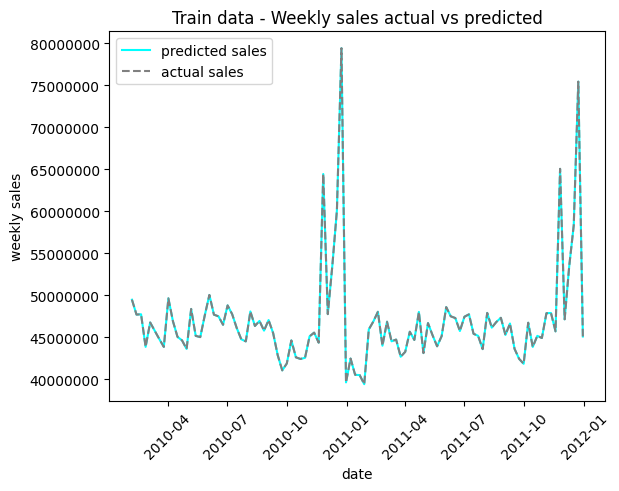

In [7]:
#Train Data
sns.lineplot(data=train, x='Date', y=train.groupby(['Date'])['Predicted_Sales'].transform('sum'),
             label='predicted sales', errorbar=None,
             color='cyan')
sns.lineplot(data=train, x='Date', y=train.groupby(['Date'])['Weekly_Sales'].transform('sum'), 
             label ='actual sales', errorbar=None,
             color='grey', linestyle='--')
plt.title('Train data - Weekly sales actual vs predicted')
plt.ylabel('weekly sales')
plt.xlabel('date')
plt.xticks(rotation=45)
plt.legend()
plt.ticklabel_format(style='plain', axis='y');

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Plotting actual target versus predicted target - Validation data </div>

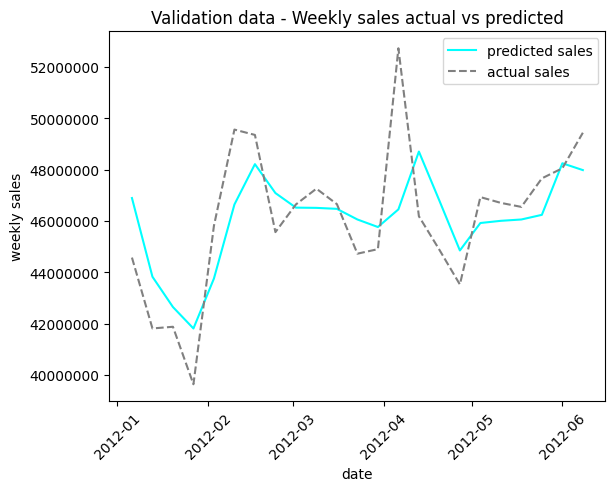

In [8]:
#Validation Data
sns.lineplot(data=validation, x='Date', y=validation.groupby(['Date'])['Predicted_Sales'].transform('sum'), 
             label='predicted sales', errorbar=None,
             color='cyan')
sns.lineplot(data=validation, x='Date', y=validation.groupby(['Date'])['Weekly_Sales'].transform('sum'), 
             label ='actual sales', errorbar=None,
             color='grey', linestyle='--')
plt.title('Validation data - Weekly sales actual vs predicted')
plt.ylabel('weekly sales')
plt.xlabel('date')
plt.xticks(rotation=45)
plt.legend()
plt.ticklabel_format(style='plain', axis='y');

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Plotting actual target versus predicted target - Test data </div>

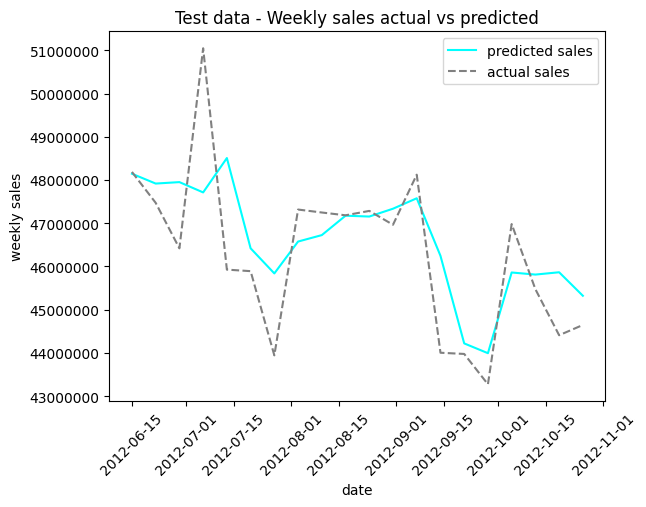

In [9]:
#Test data
sns.lineplot(data=test, x='Date', y=test.groupby(['Date'])['Predicted_Sales'].transform('sum'),
             label='predicted sales', errorbar=None,
             color='cyan')
sns.lineplot(data=test, x='Date', y=test.groupby(['Date'])['Weekly_Sales'].transform('sum'),
             label ='actual sales', errorbar=None,
             color='grey', linestyle='--')
plt.title('Test data - Weekly sales actual vs predicted')
plt.ylabel('weekly sales')
plt.xlabel('date')
plt.xticks(rotation=45)
plt.legend()
plt.ticklabel_format(style='plain', axis='y');

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Plotting actual target versus predicted target - Single store and department </div>

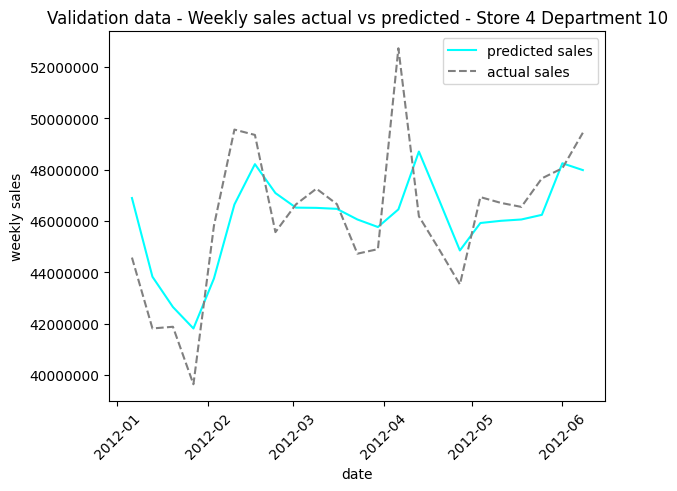

In [10]:
# Template to plot single store and department
sns.lineplot(data=validation.query('Store==4 and Dept==10'), 
             x='Date', y=validation.groupby(['Date'])['Predicted_Sales'].transform('sum'), 
             label='predicted sales', errorbar=None,
             color='cyan')
sns.lineplot(data=validation.query('Store==4 and Dept==10'), 
             x='Date', y=validation.groupby(['Date'])['Weekly_Sales'].transform('sum'), 
             label ='actual sales', errorbar=None, 
             color='grey', linestyle='--')
plt.title('Validation data - Weekly sales actual vs predicted - Store 4 Department 10')
plt.ylabel('weekly sales')
plt.xlabel('date')
plt.xticks(rotation=45)
plt.legend()
plt.ticklabel_format(style='plain', axis='y');

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Plotting actual target versus predicted target - All data </div>

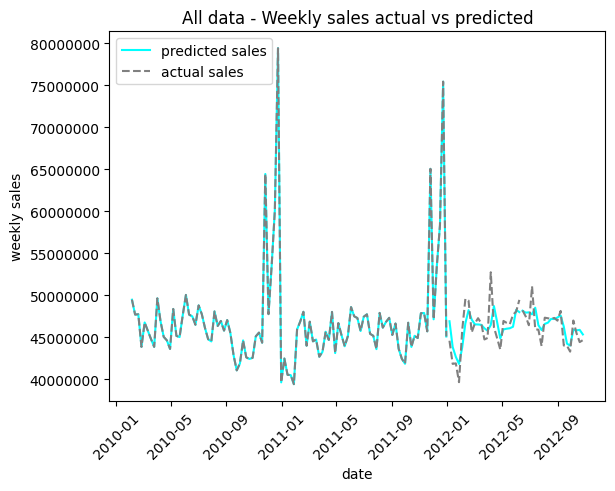

In [11]:

sns.lineplot(data=train, x='Date', y=train.groupby(['Date'])['Predicted_Sales'].transform('sum'), 
             label='predicted sales', errorbar=None,
             color='cyan')
sns.lineplot(data=train, x='Date', y=train.groupby(['Date'])['Weekly_Sales'].transform('sum'), 
             label ='actual sales', color='grey', 
             linestyle='--', errorbar=None)
sns.lineplot(data=validation, x='Date', y=validation.groupby(['Date'])['Predicted_Sales'].transform('sum'), 
             errorbar=None, color='cyan')
sns.lineplot(data=validation, x='Date', y=validation.groupby(['Date'])['Weekly_Sales'].transform('sum'), 
             errorbar=None, color='grey', linestyle='--')
sns.lineplot(data=test, x='Date', y=test.groupby(['Date'])['Predicted_Sales'].transform('sum'), 
             errorbar=None, color='cyan')
sns.lineplot(data=test, x='Date', y=test.groupby(['Date'])['Weekly_Sales'].transform('sum'), 
             errorbar=None, color='grey', linestyle='--')
plt.title('All data - Weekly sales actual vs predicted')
plt.ylabel('weekly sales')
plt.xlabel('date')
plt.xticks(rotation=45)
plt.legend()
plt.ticklabel_format(style='plain', axis='y');

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Error Analysis Train</div>

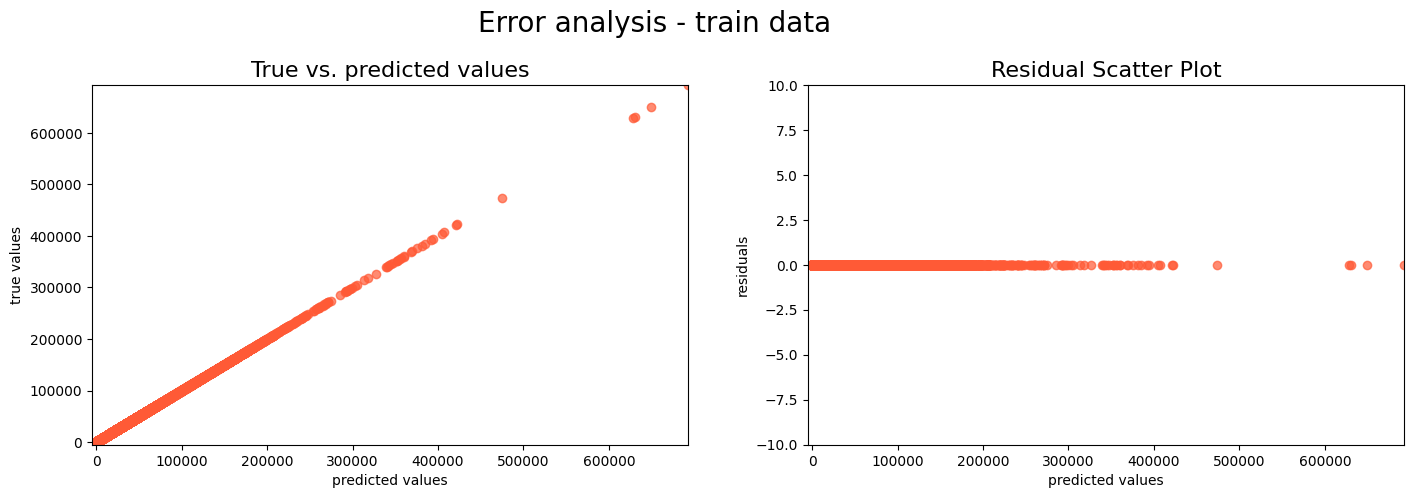

In [12]:
error_analysis(y_train, y_pred_train)
plt.suptitle('Error analysis - train data', fontsize=20)
plt.subplots_adjust(top=0.83);

In [ ]:
# having a look at observations with largest residuals
train['Residuals'] = train.Weekly_Sales - train.Predicted_Sales
train.query('Residuals >= 40000 or Residuals <= -40000')

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Error Analysis Validation</div>

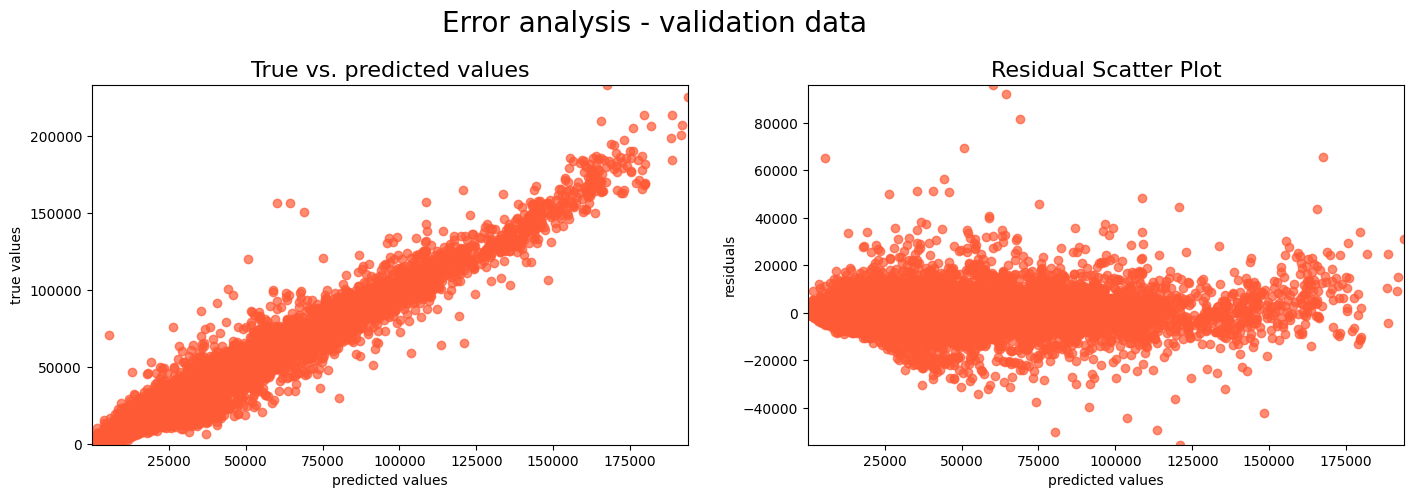

In [13]:
error_analysis(y_validation, y_pred_validation)
plt.suptitle('Error analysis - validation data', fontsize=20)
plt.subplots_adjust(top=0.83);

In [ ]:
# having a look at observations with largest residuals
validation['Residuals'] = validation.Weekly_Sales - validation.Predicted_Sales
validation.query('Residuals >= 40000 or Residuals <= -40000')

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Error Analysis Test</div>

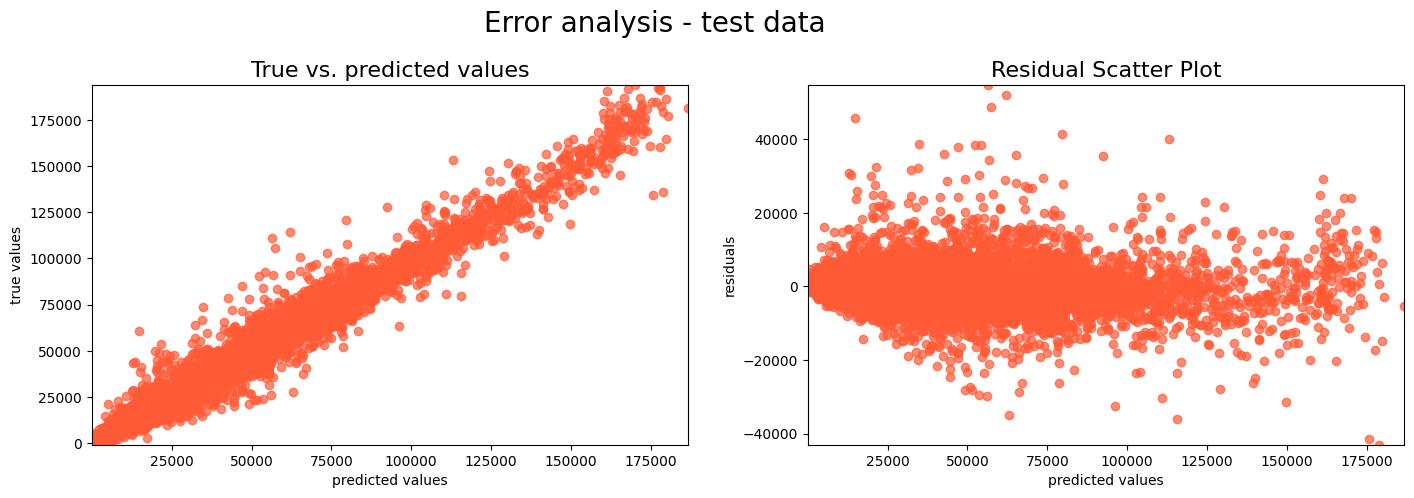

In [14]:
error_analysis(y_test, y_pred_test)
plt.suptitle('Error analysis - test data', fontsize=20)
plt.subplots_adjust(top=0.83);

In [ ]:
test['Residuals'] = test.Weekly_Sales - test.Predicted_Sales
test.query('Residuals >= 30000 or Residuals <= -30000')

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Merge validation and test => Prediction time</div>

In [16]:
validation_and_test = pd.concat([validation, test], axis=0)

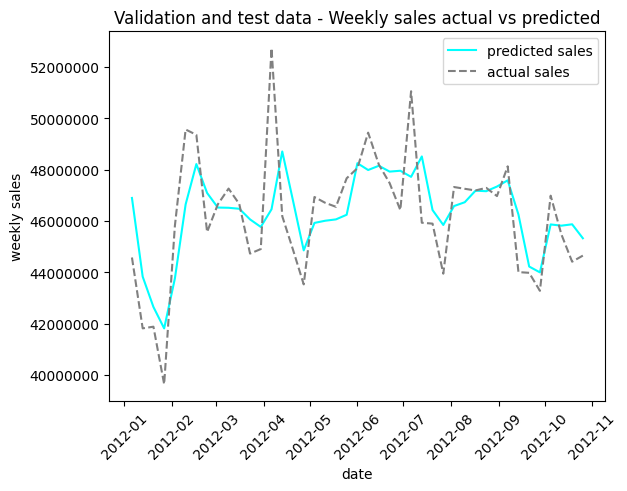

In [17]:
# plot prediction time
sns.lineplot(data=validation_and_test, x='Date', 
             y=validation_and_test.groupby(['Date'])['Predicted_Sales'].transform('sum'), 
             label='predicted sales', errorbar=None,
             color='cyan')
sns.lineplot(data=validation_and_test, x='Date', 
             y=validation_and_test.groupby(['Date'])['Weekly_Sales'].transform('sum'), 
             label ='actual sales', color='grey', 
             linestyle='--', errorbar=None)
plt.title('Validation and test data - Weekly sales actual vs predicted')
plt.ylabel('weekly sales')
plt.xlabel('date')
plt.xticks(rotation=45)
plt.legend()
plt.ticklabel_format(style='plain', axis='y');